# USGS dataretrieval Python Package `get_gwlevels()` Examples

This notebook provides examples of using the Python dataretrieval package to retrieve groundwater level data for a United States  Geological Survey (USGS) monitoring site. The dataretrieval package provides a collection of functions to get data from the USGS National Water Information System (NWIS) and other online sources of hydrology and water quality data, including the United States Environmental Protection Agency (USEPA).

### Install the Package

Use the following code to install the package if it doesn't exist already within your Jupyter Python environment.

In [1]:
!pip install dataretrieval

Defaulting to user installation because normal site-packages is not writeable


Load the package so you can use it along with other packages used in this notebook.

In [2]:
from dataretrieval import nwis
from IPython.display import display

### Basic Usage

The dataretrieval package has several functions that allow you to retrieve data from different web services. This examples uses the `get_gwlevels()` function to retrieve groundwater level data from USGS NWIS. The following arguments are supported:

Arguments (Additional parameters, if supplied, will be used as query parameters)

* **sites** (string or list of strings): A list of USGS site identifiers for which to retrieve data.
* **start** (string): The beginning date for a period for which to retrieve data. If the waterdata parameter begin_date is supplied, it will overwrite the start parameter (defaults to '1851-01-01')
* **end** (string): The ending date for a period for which to retrieve data. If the waterdata parameter end_date is supplied, it will overwrite the end parameter.

Example 1: Get groundwater level data for a single monitoring site.

In [3]:
# Set the parameters needed to retrieve data
site_id = "434400121275801"

# Retrieve the data
data = nwis.get_gwlevels(sites=site_id)
print("Retrieved " + str(len(data[0])) + " data values.")

Retrieved 248 data values.


/home/runner/.local/lib/python3.10/site-packages/dataretrieval/utils.py:89: UserWarning: Warning: 189 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


### Interpreting the Result

The result of calling the `get_gwlevels()` function is an object that contains a Pandas data frame and an associated metadata object. The Pandas data frame contains the data requested. The data frame is indexed by the dates associated with the data values.

Once you've got the data frame, there's several useful things you can do to explore the data.

Display the data frame as a table

In [4]:
display(data[0])

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
datetime,,,,,,,,,,,,,,,,
1945-10-12 22:35:00+00:00,USGS,434400121275801,GW,1945-10-12,22:35,+0000,27.35,NaN,NaN,1,USGS,m,2,S,O,A
1999-06-04 18:00:00+00:00,USGS,434400121275801,GW,1999-06-04,18:00,+0000,16.78,NaN,NaN,1,USGS,m,2,S,S,A
1999-08-19 17:25:00+00:00,USGS,434400121275801,GW,1999-08-19,17:25,+0000,15.06,NaN,NaN,1,USGS,m,2,S,V,A
1999-11-19 18:40:00+00:00,USGS,434400121275801,GW,1999-11-19,18:40,+0000,17.62,NaN,NaN,1,USGS,m,2,S,S,A
2000-02-11 17:25:00+00:00,USGS,434400121275801,GW,2000-02-11,17:25,+0000,21.00,NaN,NaN,1,USGS,m,2,S,S,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,USGS,434400121275801,GW,1998-09-25,NaN,+0000,17.36,NaN,NaN,1,NaN,D,2,NaN,S,A
NaT,USGS,434400121275801,GW,1998-11-19,NaN,+0000,19.85,NaN,NaN,1,USGS,D,2,S,S,A
NaT,USGS,434400121275801,GW,1998-12-15,NaN,+0000,20.33,NaN,NaN,1,USGS,D,2,S,S,A


Show the data types of the columns in the resulting data frame.

In [5]:
print(data[0].dtypes)

agency_cd         object
site_no           object
site_tp_cd        object
lev_dt            object
lev_tm            object
lev_tz_cd         object
lev_va           float64
sl_lev_va        float64
sl_datum_cd      float64
lev_status_cd     object
lev_agency_cd     object
lev_dt_acy_cd     object
lev_acy_cd         int64
lev_src_cd        object
lev_meth_cd       object
lev_age_cd        object
dtype: object


Get summary statistics for the daily streamflow values.

In [6]:
data[0]['lev_va'].describe()

count    248.000000
mean      23.690605
std        5.265540
min       10.900000
25%       20.127500
50%       24.495000
75%       27.375000
max       41.630000
Name: lev_va, dtype: float64

Make a quick time series plot.

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('1945-10-12 22:35:00+0000', tz='UTC'),
       Timestamp('1999-06-04 18:00:00+0000', tz='UTC'),
       Timestamp('1999-08-19 17:25:00+0000', tz='UTC'),
       Timestamp('1999-11-19 18:40:00+0000', tz='UTC'),
       Timestamp('2000-02-11 17:25:00+0000', tz='UTC'),
       Timestamp('2000-03-09 22:30:00+0000', tz='UTC'),
       Timestamp('2000-05-26 16:00:00+0000', tz='UTC'),
       Timestamp('2000-08-22 21:55:00+0000', tz='UTC'),
       Timestamp('2000-11-15 21:59:00+0000', tz='UTC'),
       Timestamp('2001-03-21 00:03:00+0000', tz='UTC'),
       Timestamp('2001-05-05 01:10:00+0000', tz='UTC'),
       Timestamp('2001-05-30 20:13:00+0000', tz='UTC'),
       Timestamp('2001-07-18 17:15:00+0000', tz='UTC'),
       Timestamp('2001-08-30 15:34:00+0000', tz='UTC'),
       Timestamp('2001-09-26 15:49:00+0000', tz='UTC'),
       Timestamp('2001-10-30 23:09:00+0000', tz='UTC'),
       Timestamp('2001-11-29 18:00:00+0000', tz='UTC'),
       Timestamp('2001-12-27 22:33:00+0000', tz='UTC'),
       Timestamp('2002-01-28 22:09:00+0000', tz='UTC'),
       Timestamp('2002-02-25 22:50:00+0000', tz='UTC'),
       Timestamp('2002-03-25 22:01:00+0000', tz='UTC'),
       Timestamp('2002-04-30 16:50:00+0000', tz='UTC'),
       Timestamp('2002-05-30 22:05:00+0000', tz='UTC'),
       Timestamp('2002-08-14 18:24:00+0000', tz='UTC'),
       Timestamp('2002-09-12 15:41:00+0000', tz='UTC'),
       Timestamp('2002-11-13 22:45:00+0000', tz='UTC'),
       Timestamp('2003-02-11 22:57:00+0000', tz='UTC'),
       Timestamp('2003-05-13 21:23:00+0000', tz='UTC'),
       Timestamp('2003-09-09 23:29:00+0000', tz='UTC'),
       Timestamp('2003-12-01 22:59:00+0000', tz='UTC'),
       Timestamp('2004-01-18 22:42:00+0000', tz='UTC'),
       Timestamp('2004-04-30 19:46:00+0000', tz='UTC'),
       Timestamp('2004-07-15 17:53:00+0000', tz='UTC'),
       Timestamp('2004-10-15 17:38:00+0000', tz='UTC'),
       Timestamp('2005-01-07 18:24:00+0000', tz='UTC'),
       Timestamp('2005-04-08 17:13:00+0000', tz='UTC'),
       Timestamp('2005-07-15 16:47:00+0000', tz='UTC'),
       Timestamp('2005-10-07 17:52:00+0000', tz='UTC'),
       Timestamp('2006-01-13 19:23:00+0000', tz='UTC'),
       Timestamp('2006-05-26 14:16:00+0000', tz='UTC'),
       Timestamp('2006-07-14 18:22:00+0000', tz='UTC'),
       Timestamp('2006-10-19 23:15:00+0000', tz='UTC'),
       Timestamp('2007-01-12 19:10:00+0000', tz='UTC'),
       Timestamp('2007-04-06 15:34:00+0000', tz='UTC'),
       Timestamp('2007-10-04 23:40:00+0000', tz='UTC'),
       Timestamp('2008-04-03 21:55:00+0000', tz='UTC'),
       Timestamp('2008-10-29 21:33:00+0000', tz='UTC'),
       Timestamp('2009-05-20 18:29:00+0000', tz='UTC'),
       Timestamp('2009-06-09 16:33:00+0000', tz='UTC'),
       Timestamp('2009-11-25 17:33:00+0000', tz='UTC'),
       Timestamp('2010-05-28 16:50:00+0000', tz='UTC'),
       Timestamp('2010-11-29 23:20:00+0000', tz='UTC'),
       Timestamp('2011-10-07 18:58:00+0000', tz='UTC'),
       Timestamp('2012-10-11 21:24:00+0000', tz='UTC'),
       Timestamp('2012-10-12 01:49:00+0000', tz='UTC'),
       Timestamp('2013-10-31 17:42:00+0000', tz='UTC'),
       Timestamp('2014-10-15 21:07:00+0000', tz='UTC'),
       Timestamp('2015-10-22 17:52:00+0000', tz='UTC'),
       Timestamp('2016-10-26 16:22:00+0000', tz='UTC'), NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT, NaT,
       NaT, NaT, NaT, NaT], dtype=object)

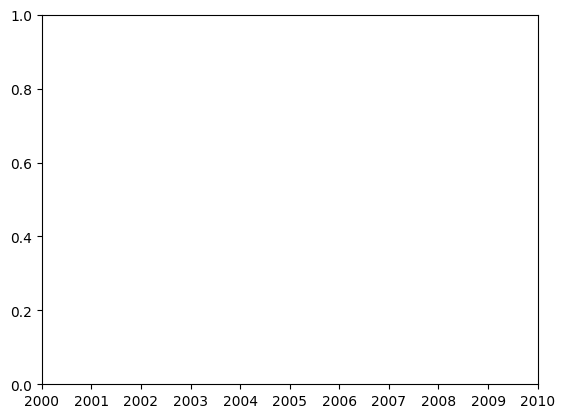

In [7]:
ax = data[0].plot(y='lev_va')
ax.set_xlabel('Date')
ax.set_ylabel('Water Level (feet below land surface)')

The other part of the result returned from the `get_gwlevels()` function is a metadata object that contains information about the query that was executed to return the data. For example, you can access the URL that was assembled to retrieve the requested data from the USGS web service. The USGS web service responses contain a descriptive header that defines and can be helpful in interpreting the contents of the response.

In [8]:
print("The query URL used to retrieve the data from  NWIS was: " + data[1].url)

The query URL used to retrieve the data from  NWIS was: https://waterservices.usgs.gov/nwis/gwlevels?startDT=1851-01-01&sites=434400121275801&format=rdb


### Additional Examples

You can also request data for multiple sites at the same time.

Example 2: Get data for multiple sites. Site numbers are specified using a comma delimited list of strings.

In [9]:
site_ids = ["434400121275801", "375907091432201"]
data2 = nwis.get_gwlevels(sites=site_ids)
print("Retrieved " + str(len(data2[0])) + " data values.")
display(data2[0])

Retrieved 311 data values.


/home/runner/.local/lib/python3.10/site-packages/dataretrieval/utils.py:89: UserWarning: Warning: 207 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


agency_cd site_tp_cd      lev_dt  \
site_no         datetime                                                     
375907091432201 2007-01-26 17:08:00+00:00      USGS         GW  2007-01-26   
                2007-06-11 19:30:00+00:00      USGS         GW  2007-06-11   
                2007-07-23 14:30:00+00:00      USGS         GW  2007-07-23   
                2007-09-04 20:15:00+00:00      USGS         GW  2007-09-04   
                2007-10-01 15:17:00+00:00      USGS         GW  2007-10-01   
...                                             ...        ...         ...   
434400121275801 NaT                            USGS         GW  1998-09-25   
                NaT                            USGS         GW  1998-11-19   
                NaT                            USGS         GW  1998-12-15   
                NaT                            USGS         GW  1999-03-19   
                NaT                            USGS         GW  1999-05-14   

                                          lev_tm lev_tz_cd  lev_va  sl_lev_va  \
site_no         datetime                                                        
375907091432201 2007-01-26 17:08:00+00:00  17:08     +0000  317.21        NaN   
                2007-06-11 19:30:00+00:00  19:30     +0000  309.32        NaN   
                2007-07-23 14:30:00+00:00  14:30     +0000  321.35        NaN   
                2007-09-04 20:15:00+00:00  20:15     +0000  326.55        NaN   
                2007-10-01 15:17:00+00:00  15:17     +0000  317.01        NaN   
...                                          ...       ...     ...        ...   
434400121275801 NaT                          NaN     +0000   17.36        NaN   
                NaT                          NaN     +0000   19.85        NaN   
                NaT                          NaN     +0000   20.33        NaN   
                NaT                          NaN     +0000   19.05        NaN   
                NaT                          NaN     +0000   18.01        NaN   

                                           sl_datum_cd lev_status_cd  \
site_no         datetime                                               
375907091432201 2007-01-26 17:08:00+00:00          NaN             1   
                2007-06-11 19:30:00+00:00          NaN             1   
                2007-07-23 14:30:00+00:00          NaN             1   
                2007-09-04 20:15:00+00:00          NaN             1   
                2007-10-01 15:17:00+00:00          NaN             1   
...                                                ...           ...   
434400121275801 NaT                                NaN             1   
                NaT                                NaN             1   
                NaT                                NaN             1   
                NaT                                NaN             1   
                NaT                                NaN             1   

                                          lev_agency_cd lev_dt_acy_cd  \
site_no         datetime                                                
375907091432201 2007-01-26 17:08:00+00:00          USGS             m   
                2007-06-11 19:30:00+00:00         MO005             m   
                2007-07-23 14:30:00+00:00         MO005             m   
                2007-09-04 20:15:00+00:00         MO005             m   
                2007-10-01 15:17:00+00:00         MO005             m   
...                                                 ...           ...   
434400121275801 NaT                                 NaN             D   
                NaT                                USGS             D   
                NaT                                USGS             D   
                NaT                                 NaN             D   
                NaT                                USGS             D   

                                          lev_acy_cd lev_src_cd lev_meth_cd  \
site_no

Some groundwater level data have dates that include only a year or a month and year, but no day.

Example 3: Retrieve groundwater level data that have dates without a day.

In [10]:
data3 = nwis.get_gwlevels(sites="425957088141001")
print("Retrieved " + str(len(data3[0])) + " data values.")

# Print the date/time index values, which show up as NaT because
# the dates can't be converted to a date/time data type
print(data3[0].index)

Retrieved 34 data values.
DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT'],
              dtype='datetime64[ns, UTC]', name='datetime', freq=None)


/home/runner/.local/lib/python3.10/site-packages/dataretrieval/utils.py:89: UserWarning: Warning: 34 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


If you want to see the USGS RDB (delimited text) version of the data just retrieved, you can get the URL for the request that was sent to the USGS web service.

In [11]:
# Print the URL used to retrieve the data
print("You can examine the data retrieved from NWIS at: " + data3[1].url)

You can examine the data retrieved from NWIS at: https://waterservices.usgs.gov/nwis/gwlevels?startDT=1851-01-01&sites=425957088141001&format=rdb


You can also retrieve data for a site within a specified time window by specifying a start date and an end date.

Example 4: Get groundwater level data for a site between a startDate and endDate.

In [12]:
data4 = nwis.get_gwlevels(sites=site_id, start="1980-01-01", end="2000-12-31")
print("Retrieved " + str(len(data4[0])) + " data values.")


Retrieved 71 data values.


/home/runner/.local/lib/python3.10/site-packages/dataretrieval/utils.py:89: UserWarning: Warning: 63 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(
